## Gradient Descent in 2D

Gradient descent is an iterative optimization algorithm used to find a (local) minimum of a scalar function.  
In two dimensions, we seek the minimum of a function \( f(x, y) \) by moving the point \( (x, y) \) iteratively in the direction of steepest descent — the negative gradient.

The gradient is the vector of partial derivatives:

$$
\nabla f(x, y) = \left( \frac{\partial f}{\partial x},\; \frac{\partial f}{\partial y} \right)
$$

A basic gradient-descent update rule is:

$$

(x, y) \leftarrow (x, y) - \alpha \, \nabla f(x, y)


$$

where \( \alpha \) (the learning rate or step size) controls how far we move along the negative gradient at each step.
Choosing \( \alpha \) properly is essential: too small makes convergence slow; too large can cause divergence or oscillations.

This 2D setting is convenient for visualization: we can plot contour lines of \( f \), overlay the gradient vector field, and show the trajectory of the iterates as they move toward a minimum. Common phenomena include:

- Convergence to a local minimum when the function is well-behaved and the learning rate is appropriate.
- Oscillations or divergence when the learning rate is too large or when contours are elongated (ill-conditioned problems).
- Saddle points where gradients vanish but are not minima, which can slow progress.

Extensions commonly explored include stochastic gradient updates, momentum, adaptive step sizes, and visualization of convergence speed.

This notebook demonstrates these ideas with simple 2D examples, contour plots, vector fields, and animated or stepwise trajectories to build intuition about gradient descent in two dimensions.

$$
$$


In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

$$f(x,y) = 3(1-x)^2e^{-x^2-(y+1)^2} - 10 (\frac{x}{5} - x^3 - y^5)e^{-x^2-y^2} - \frac{1}{3}e^{-(x+1)^2} - y^2$$


In [2]:
x, y = sp.symbols("x y")

f_sym = (
    3 * (1 - x) ** 2 * sp.exp(-(x**2) - (y + 1) ** 2)
    - 10 * (x / 5 - x**3 - y**5) * sp.exp(-(x**2) - y**2)
    - sp.Rational(1, 3) * sp.exp(-((x + 1) ** 2))
    - y**2
)

fx_sym = sp.diff(f_sym, x)
fy_sym = sp.diff(f_sym, y)

f = sp.lambdify((x, y), f_sym, "numpy")
fx = sp.lambdify((x, y), fx_sym, "numpy")
fy = sp.lambdify((x, y), fy_sym, "numpy")

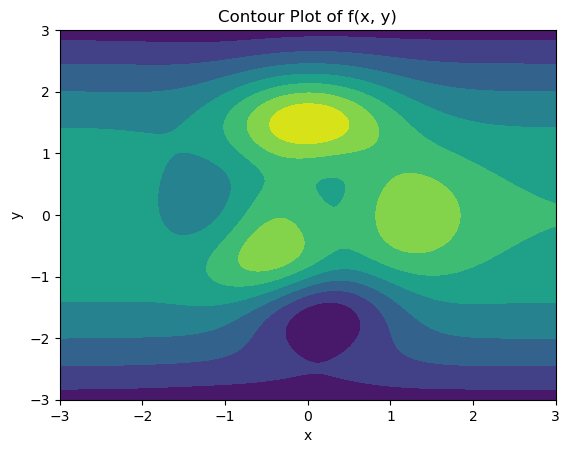

In [3]:
# grid
x = np.linspace(-3, 3, 1001)
y = np.linspace(-3, 3, 1001)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)


# 2D contour plot
plt.figure()
plt.contourf(X, Y, Z)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Contour Plot of f(x, y)")
plt.show()

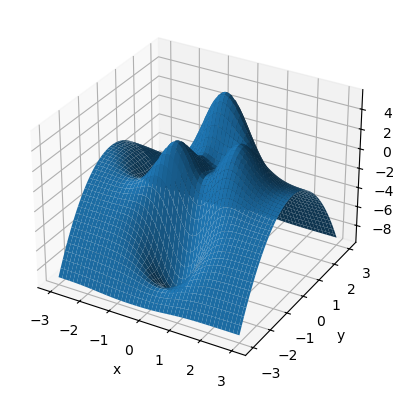

In [4]:
# 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, Y, Z)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")
plt.show()

### Gradient Descent in 2D


In [5]:
localmin = np.array([np.random.choice(x, 1)[0], np.random.choice(y, 1)[0]])
starting_point = localmin[:]

learning_rate = 0.01
training_epochs = 1000
trajectory = np.zeros((training_epochs, 2))

for i in range(training_epochs):
    grad = np.array(
        [
            fx(localmin[0], localmin[1]),
            fy(localmin[0], localmin[1]),
        ]
    )

    localmin = localmin - learning_rate * grad
    trajectory[i, :] = localmin

print("LocalMin: ", localmin)
print("StartingPoint: ", starting_point)

LocalMin:  [ 0.19419188 -1.76400643]
StartingPoint:  [ 0.39 -0.45]


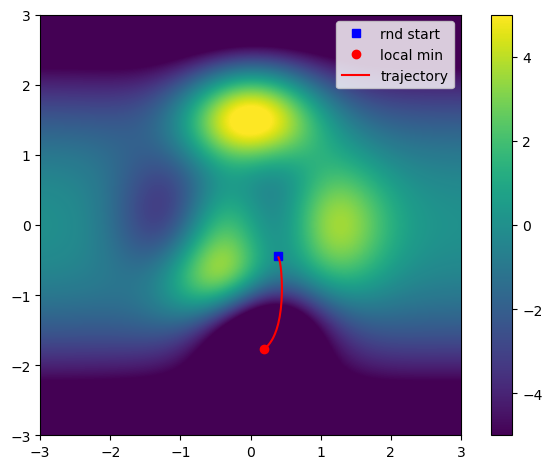

In [6]:
plt.imshow(
    Z, extent=[x.min(), x.max(), y.min(), y.max()], origin="lower", vmin=-5, vmax=5
)

plt.plot(starting_point[0], starting_point[1], "bs", label="rnd start")
plt.plot(localmin[0], localmin[1], "ro", label="local min")
plt.plot(trajectory[:, 0], trajectory[:, 1], "r", label="trajectory")

plt.xlim(x.min(), x.max())
plt.ylim(y.min(), y.max())

plt.colorbar()
plt.legend()
plt.tight_layout()
plt.show()